# Loading Dataset

In [0]:
data = spark.sql('SELECT * from amazon_cells')
data = data.toPandas()
data.head()

Out[1]:

,Text,Label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [0]:
data.shape

Out[2]: (1000, 2)

Out[3]:

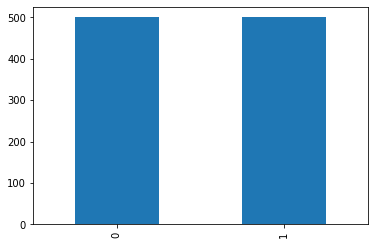

<AxesSubplot:>

In [0]:
data['Label'].value_counts().plot.bar()

# Method 1 - NLTK

In [0]:
import nltk

In [0]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data] | 
[nltk_data] | Downloading package abc to /root/nltk_data...
[nltk_data] | Package abc is already up-to-date!
[nltk_data] | Downloading package alpino to /root/nltk_data...
[nltk_data] | Package alpino is already up-to-date!
[nltk_data] | Downloading package averaged_perceptron_tagger to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package averaged_perceptron_tagger is already up-
[nltk_data] | to-date!
[nltk_data] | Downloading package averaged_perceptron_tagger_ru to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package averaged_perceptron_tagger_ru is already
[nltk_data] | up-to-date!
[nltk_data] | Downloading package basque_grammars to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package basque_grammars is already up-to-date!
[nltk_data] | Downloading package biocreative_ppi to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package biocreative_ppi is already up-to-date!
[nltk_data] | Downloading package bllip_wsj_no_aux to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package bllip_wsj_no_aux is already up-to-date!
[nltk_data] | Downloading package book_grammars to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package book_grammars is already up-to-date!
[nltk_data] | Downloading package brown to /root/nltk_data...
[nltk_data] | Package brown is already up-to-date!
[nltk_data] | Downloading package brown_tei to /root/nltk_data...
[nltk_data] | Package brown_tei is already up-to-date!
[nltk_data] | Downloading package cess_cat to /root/nltk_data...
[nltk_data] | Package cess_cat is already up-to-date!
[nltk_data] | Downloading package cess_esp to /root/nltk_data...
[nltk_data] | Package cess_esp is already up-to-date!
[nltk_data] | Downloading package chat80 to /root/nltk_data...
[nltk_data] | Package chat80 is already up-to-date!
[nltk_data] | Downloading package city_database to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package city_database is already up-to-date!
[nltk_data] | Downloading package cmudict to /root/nltk_data...
[nltk_data] | Package cmudict is already up-to-date!
[nltk_data] | Downloading package comparative_sentences to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package comparative_sentences is already up-to-
[nltk_data] | date!
[nltk_data] | Downloading package comtrans to /root/nltk_data...
[nltk_data] | Package comtrans is already up-to-date!
[nltk_data] | Downloading package conll2000 to /root/nltk_data...
[nltk_data] | Package conll2000 is already up-to-date!
[nltk_data] | Downloading package conll2002 to /root/nltk_data...
[nltk_data] | Package conll2002 is already up-to-date!
[nltk_data] | Downloading package conll2007 to /root/nltk_data...
[nltk_data] | Package conll2007 is already up-to-date!
[nltk_data] | Downloading package crubadan to /root/nltk_data...
[nltk_data] | Package crubadan is already up-to-date!
[nltk_data] | Downloading package dependency_treebank to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package dependency_treebank is already up-to-date!
[nltk_data] | Downloading package dolch to /root/nltk_data...
[nltk_data] | Package dolch is already up-to-date!
[nltk_data] | Downloading package europarl_raw to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package europarl_raw is already up-to-date!
[nltk_data] | Downloading package floresta to /root/nltk_data...
[nltk_data] | Package floresta is already up-to-date!
[nltk_data] | Downloading package framenet_v15 to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package framenet_v15 is already up-to-date!
[nltk_data] | Downloading package framenet_v17 to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package framenet_v17 is already up-to-date!
[nltk_data] | Downloading package gazetteers to /root/nltk_data...
[nltk_data] | Package gazetteers is already up-to-date!
[nltk_data] | Downloading package genesis to /root/nltk_data...
[nltk_data] | Package genesis is already up-to-date!
[nltk_data] | Downloading package gutenberg to /root/nltk_data...
[nltk_data] | Package g

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

In [0]:
sent.polarity_scores("I am loving it.")

Out[7]: {'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'compound': 0.5994}

In [0]:
sent.polarity_scores("The food was horrible.")

Out[8]: {'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

In [0]:
sent.polarity_scores("The food was horrible overall but Pizza was amazing.")

Out[9]: {'neg': 0.156, 'neu': 0.484, 'pos': 0.36, 'compound': 0.6059}

In [0]:
# define a function
def check_sentiment(x):
    return sent.polarity_scores(x)['compound']

In [0]:
data['compound_score'] = data['Text'].apply(lambda x: check_sentiment(x))

In [0]:
data.head()

Out[12]:

,Text,Label,compound_score
0,So there is no way for me to plug it in here i...,0,-0.3535
1,"Good case, Excellent value.",1,0.8402
2,Great for the jawbone.,1,0.6249
3,Tied to charger for conversations lasting more...,0,-0.6145
4,The mic is great.,1,0.6249


Out[13]:

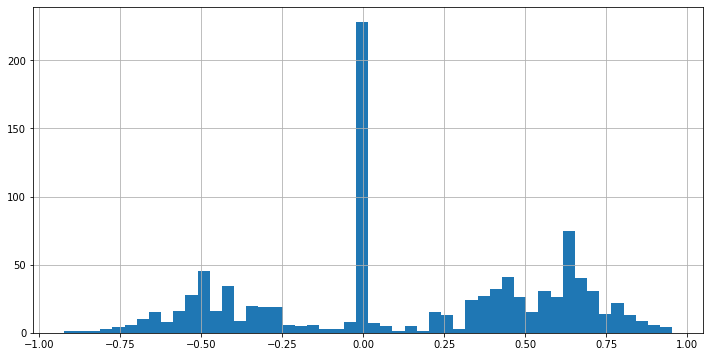

<AxesSubplot:>

In [0]:
data['compound_score'].hist(bins=50, figsize=(12,6))

In [0]:
# generate label function
def generate_label(x):
    return 1 if x>0 else 0

In [0]:
data['Predicted_Label'] = data['compound_score'].apply(lambda x: generate_label(x))

In [0]:
data.head()

Out[16]:

,Text,Label,compound_score,Predicted_Label
0,So there is no way for me to plug it in here i...,0,-0.3535,0
1,"Good case, Excellent value.",1,0.8402,1
2,Great for the jawbone.,1,0.6249,1
3,Tied to charger for conversations lasting more...,0,-0.6145,0
4,The mic is great.,1,0.6249,1


In [0]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(data['Label'],data['Predicted_Label'])

Out[17]: 0.833

In [0]:
print(confusion_matrix(data['Label'],data['Predicted_Label']))

[[423 77]
 [ 90 410]]

# Method 2 - TextBlob

In [0]:
from textblob import TextBlob

In [0]:
tb = TextBlob("I am loving this.")

In [0]:
# check sentiment
tb.sentiment

Out[21]: Sentiment(polarity=0.6, subjectivity=0.95)

In [0]:
# directly access polarity
tb.polarity

Out[22]: 0.6

In [0]:
TextBlob("The food was horrible.").sentiment

Out[23]: Sentiment(polarity=-1.0, subjectivity=1.0)

In [0]:
TextBlob("The food is amazing").sentiment

Out[24]: Sentiment(polarity=0.6000000000000001, subjectivity=0.9)

In [0]:
def check_sentiment(x):
    return TextBlob(x).polarity

In [0]:
data['polarity_score'] = data['Text'].apply(lambda x: check_sentiment(x))

In [0]:
data.head()

Out[27]:

,Text,Label,compound_score,Predicted_Label,polarity_score
0,So there is no way for me to plug it in here i...,0,-0.3535,0,0.000000
1,"Good case, Excellent value.",1,0.8402,1,0.850000
2,Great for the jawbone.,1,0.6249,1,0.800000
3,Tied to charger for conversations lasting more...,0,-0.6145,0,0.390625
4,The mic is great.,1,0.6249,1,0.800000


Out[28]:

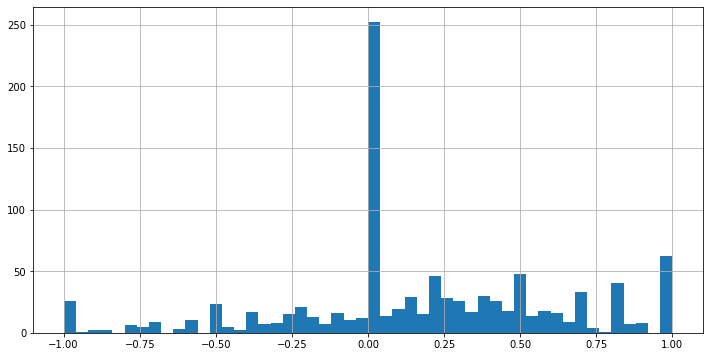

<AxesSubplot:>

In [0]:
data['polarity_score'].hist(bins=50, figsize=(12,6))

In [0]:
def generate_label(x):
    return 1 if x>0 else 0

In [0]:
data['Predicted_Label_Textblob'] = data['polarity_score'].apply(lambda x: generate_label(x))

In [0]:
data.head()

Out[31]:

,Text,Label,compound_score,Predicted_Label,polarity_score,Predicted_Label_Textblob
0,So there is no way for me to plug it in here i...,0,-0.3535,0,0.000000,0
1,"Good case, Excellent value.",1,0.8402,1,0.850000,1
2,Great for the jawbone.,1,0.6249,1,0.800000,1
3,Tied to charger for conversations lasting more...,0,-0.6145,0,0.390625,1
4,The mic is great.,1,0.6249,1,0.800000,1


In [0]:
data.iloc[3]

Out[32]: Text Tied to charger for conversations lasting more...
Label 0
compound_score -0.6145
Predicted_Label 0
polarity_score 0.390625
Predicted_Label_Textblob 1
Name: 3, dtype: object

In [0]:
data.iloc[3]['Text']

Out[33]: 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!'

In [0]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(data['Label'],data['Predicted_Label_Textblob'])

Out[34]: 0.796

In [0]:
print(confusion_matrix(data['Label'],data['Predicted_Label_Textblob']))

[[379 121]
 [ 83 417]]

# Method 3 - Machine Learning
Team Exercise